### Download Historical Data About Various Coins

In [22]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                   \
Ticker       ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD   
Date                                                                    
2016-01-01       NaN         NaN    434.334015       NaN          NaN   
2016-01-02       NaN         NaN    433.437988       NaN          NaN   
2016-01-03       NaN         NaN    430.010986       NaN          NaN   
2016-01-04       NaN         NaN    433.091003       NaN          NaN   
2016-01-05       NaN         NaN    431.959991       NaN          NaN   
...              ...         ...           ...       ...          ...   
2025-01-02  0.961345  705.678589  96886.875000  7.168960  3451.392578   
2025-01-03  1.090376  713.643555  98107.429688  7.747455  3605.009766   
2025-01-04  1.071400  713.841187  98236.226562  7.684382  3657.706787   
2025-01-05  1.093467  709.258301  98314.960938  7.679115  3634.103760   
2025-01-06  1.077733  718.234314  98760.796875  7.633926  3636.482910   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-02  0.482731  207.767044  2.403370  0.961345  705.678589  ...   
2025-01-03  0.518211  217.747330  2.452896  1.090376  713.643555  ...   
2025-01-04  0.523265  216.622925  2.419595  1.071400  713.841187  ...   
2025-01-05  0.516061  213.393631  2.399727  1.093467  709.258301  ...   
2025-01-06  0.516964  214.927765  2.386208  1.077733  718.234314  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-02  193.872131  2.322408  1.199917e+09  1.880665e+09  46009564411   
2025-01-03  207.767609  2.403375  2.503147e+09  1.822244e+09  35611391163   
2025-01-04  217.748047  2.452897  1.175731e+09  1.524500e+09  22342608078   
2025-01-05  216.622757  2.419580  1.241264e+09  1.411809e+09  20525254825   
2025-01-06  213.395111  2.399754  1.174637e+09  1.564181e+09  29385158656   

Price                                                                         
Ticker          DOT-USD       ETH-USD  MATIC-USD       SOL-USD       XRP-USD  
Date                                                                          
2016-01-01          NaN           NaN        NaN           NaN           NaN  
2016-01-02          NaN           NaN        NaN           NaN           NaN  
2016-01-03          NaN           NaN        NaN           NaN           NaN  
2016-01-04          NaN           NaN        NaN           NaN           NaN  
2016-01-05          NaN           NaN        NaN           NaN           NaN  
...                 ...           ...        ...           ...           ...  
2025-01-02  288205887.0  2.224357e+10  6527970.0  4.230330e+09  8.345904e+09  
2025-01-03  492168497.0  2.187730e+10  6055402.0  4.064421e+09  5.804528e+09  
2025-0

In [23]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [24]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,98030.01000000,98277.83000000,97585.47000000,98035.55000000,1.52739000,2025-01-05 19:59:59.999,149548.49754220,206,0.24426000,23911.89633420,0
2025-01-05 20:00:00,98087.07000000,98777.00000000,98017.70000000,98300.03000000,2.68688000,2025-01-05 23:59:59.999,264807.37386820,466,1.82182000,179703.80053500,0
2025-01-06 00:00:00,98380.00000000,99299.93000000,97991.59000000,99022.32000000,2.09837000,2025-01-06 03:59:59.999,207086.86137180,707,1.14887000,113622.93584400,0


In [25]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,98035.55,3632.39,1.09510,704.4400,2.38420,7.605,0.5121,212.79
2025-01-05 20:00:00,98300.03,3636.34,1.09400,707.4500,2.39870,7.670,0.5144,213.41
2025-01-06 00:00:00,99022.32,3666.20,1.09020,711.6100,2.41400,7.813,0.5219,215.79
2025-01-06 04:00:00,99314.43,3649.39,1.07890,713.1700,2.39490,7.699,0.5157,215.17


In [26]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,-0.000110,0.000050,0.004955,-0.003395,0.007479,0.004093,0.002349,-0.004025
2025-01-05 20:00:00,0.002698,0.001087,-0.001004,0.004273,0.006082,0.008547,0.004491,0.002914
2025-01-06 00:00:00,0.007348,0.008212,-0.003473,0.005880,0.006378,0.018644,0.014580,0.011152
2025-01-06 04:00:00,0.002950,-0.004585,-0.010365,0.002192,-0.007912,-0.014591,-0.011880,-0.002873


### Convenience Functions

In [38]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

### Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [30]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [31]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [32]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,0.093750,0.156250,0.218750,0.031250,-0.218750,-0.15625,-0.09375,-0.03125
2025-01-05 20:00:00,0.093750,0.156250,0.218750,-0.093750,-0.218750,-0.03125,0.03125,-0.15625
2025-01-06 00:00:00,0.093750,-0.093750,0.218750,-0.031250,-0.156250,0.03125,0.15625,-0.21875
2025-01-06 04:00:00,0.031250,-0.031250,0.218750,-0.156250,0.093750,0.15625,-0.09375,-0.21875


In [36]:
strat_1_turnover = (strat_1_holdings[6].fillna(0) - strat_1_holdings[6].shift().fillna(0)).abs().sum(axis=1)
strat_1_turnover

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    1.000000
2020-01-01 12:00:00    0.666667
2020-01-01 16:00:00    0.333333
                         ...   
2025-01-05 16:00:00    0.125000
2025-01-05 20:00:00    0.500000
2025-01-06 00:00:00    0.625000
2025-01-06 04:00:00    0.875000
2025-01-06 08:00:00    1.375000
Freq: 4h, Length: 10995, dtype: float64

In [39]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,1.079601,-0.408952,0.411632,-0.262419,-0.509083,-0.509083,-0.398337,0.303728,0.684444
2025-01-05 20:00:00,0.190951,-0.048354,-0.810655,-0.151943,-0.680943,-0.770098,-0.824862,-0.281488,-0.455585
2025-01-06 00:00:00,1.848751,0.441271,-0.475133,1.236267,-0.928805,-0.583993,-1.080829,0.155256,-0.015400
2025-01-06 04:00:00,-1.053474,-1.067949,-1.320224,-2.200799,-1.206880,-1.333644,-0.385836,-1.810955,-1.435482


In [43]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.197579,-1.197579,-1.197579,-1.197579,-1.197579,-1.197579,-1.197579,-1.197579,-1.197579
2020-01-01 12:00:00,-0.176998,0.081929,0.081929,0.081929,0.081929,0.081929,0.081929,0.081929,0.081929
2020-01-01 16:00:00,-0.486952,-0.505126,0.651208,0.651208,0.651208,0.651208,0.651208,0.651208,0.651208
...,...,...,...,...,...,...,...,...,...
2025-01-05 16:00:00,-0.106649,-1.047702,-0.318368,-0.718669,-0.600333,-0.600333,-0.672087,0.121228,0.593194
2025-01-05 20:00:00,-0.356549,-1.052104,-1.175655,-1.155693,-1.228443,-1.135098,-1.007362,-0.372738,-0.729335
2025-01-06 00:00:00,1.027501,-0.014979,-1.296383,0.688767,-1.658805,-1.040243,-1.172079,0.155256,-0.106650
2025-01-06 04:00:00,-1.692224,-1.889199,-2.050224,-2.565799,-2.028130,-1.972394,-0.933336,-1.993455,-1.617982


In [44]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_sr

1    -20.715970
2    -13.340890
3    -10.397324
4     -8.107533
5     -6.957746
6     -6.893617
12    -3.964918
18    -2.874476
24    -2.359079
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

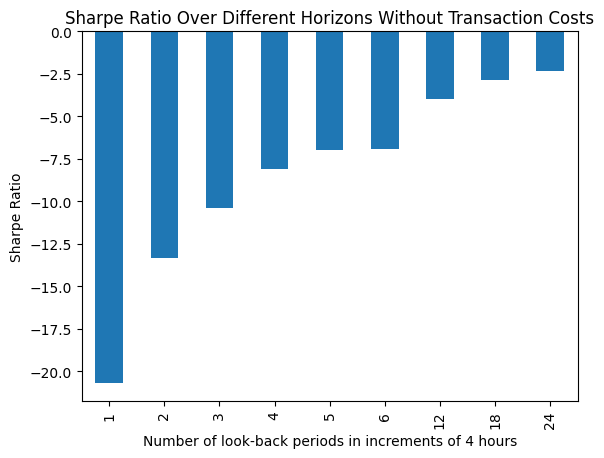

In [45]:
strat_1_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, we observe reversal at lower granularities (4 hours and 8 hours) but momentum
at higher granularities (12 hours and higher).

In [12]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('A')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_annual_sr = get_strat_1_annual_sr(strat_1_ret)
strat_1_annual_sr

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1092/1534691042.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_resample = strat_1_ret.resample('A')


,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,0.626915,6.112008,0.449440,8.889882,3.220637,5.021113,6.445948,3.126802,2.097507


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

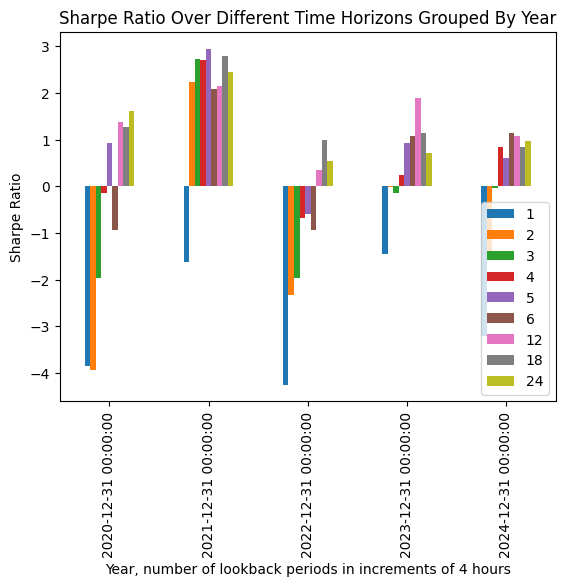

In [17]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_annual_sr.iloc[:-1].plot(kind='bar',
                                 title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                 xlabel="Year, number of lookback periods in increments of 4 hours",
                                 ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

# TO DO: Incorporate transaction costs for strategy 1

In [37]:
import numpy as np

strat_1_sr_12hr = strat_1_ret_12hr.mean() / strat_1_ret_12hr.std() * np.sqrt(365 * 24 / 4)
strat_1_sr_12hr

0.10939246057317681

In [42]:
strat_1_sr_12hr_per_year = strat_1_ret_12hr.resample('A').mean() / strat_1_ret_12hr.resample('A').std() * np.sqrt(365 * 24 / 4)
strat_1_sr_12hr_per_year

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1074/274321305.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  strat_1_sr_12hr_per_year = strat_1_ret_12hr.resample('A').mean() / strat_1_ret_12hr.resample('A').std() * np.sqrt(365 * 24 / 4)


2020-12-31   -1.972403
2021-12-31    2.724654
2022-12-31   -1.958102
2023-12-31   -0.153086
2024-12-31   -0.043546
2025-12-31    1.976651
Freq: YE-DEC, dtype: float64

<Axes: >

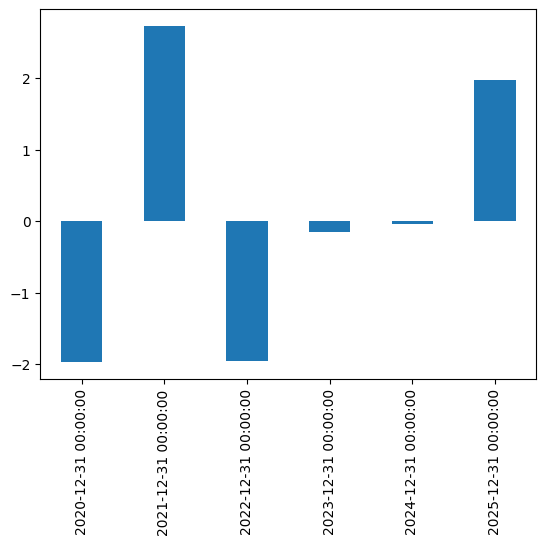

In [43]:
strat_1_sr_12hr_per_year.plot(kind='bar')

### Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

In [18]:
# Similarly to strategy 1, long high-performing coins based on average 
# returns and short low-performing coins averaged over different intervals
# but only do this for the top 2 and bottom 2 coins. This is similar to 
# the strategy from the course where only the top and bottom deciles were
# kept in the portfolio.

### Strategy 3: Testing With The Most Recent Interval Removed

In [28]:
# Similar to strategy 1: difference is to not include most recent 
# period in rolling window.